In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings 
warnings.filterwarnings("ignore")




In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
df.info() #no Null value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
print('The raw data is ', df.shape[0], 'rows and', df.shape[1], 'columns.' )

The raw data is  12330 rows and 18 columns.


In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [30]:
df.drop_duplicates()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,1,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,1,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,1,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,1,0,0


In [7]:
print('The raw data is ', df.shape[0], 'rows and', df.shape[1], 'columns.' ) #no duplicates Record 

The raw data is  12330 rows and 18 columns.


In [8]:
print('Administrative: ' , df['Administrative'].unique())
print('***************************************************')
print('Administrative_Duration: ' , df['Administrative_Duration'].unique())
print('***************************************************')
print('Informational: ' , df['Informational'].unique())
print('***************************************************')
print('Informational_Duration: ' , df['Informational_Duration'].unique())
print('***************************************************')
print('ProductRelated: ' , df['ProductRelated'].unique())
print('***************************************************')
print('ProductRelated_Duration: ' , df['ProductRelated_Duration'].unique())
print('***************************************************')
print('SpecialDay: ' , df['SpecialDay'].unique())
print('***************************************************')
print('Month: ' , df['Month'].unique())
print('***************************************************')
print('OperatingSystems: ' , df['OperatingSystems'].unique())
print('***************************************************')
print('Browser: ' , df['Browser'].unique())
print('***************************************************')
print('Region: ' , df['Region'].unique())
print('***************************************************')
print('TrafficType: ' , df['TrafficType'].unique())
print('***************************************************')
print('Weekend: ' , df['Weekend'].unique())
print('***************************************************')
print('VisitorType: ' , df['VisitorType'].unique())
print('***************************************************')
print('Revenue: ' , df['Revenue'].unique())

Administrative:  [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
***************************************************
Administrative_Duration:  [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
***************************************************
Informational:  [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
***************************************************
Informational_Duration:  [  0.   120.    16.   ... 547.75 368.25 211.25]
***************************************************
ProductRelated:  [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  

In [9]:
df['Revenue'] = df['Revenue'].astype(int)
df['Weekend'] = df['Weekend'].astype(int)
#true and false into 0s and 1s 



In [10]:
# month into numbers 
dic = {'Jan' : 1 , "Feb" : 2 , 'Mar' : 3 , 'Apr' : 4 , 'May' : 5 , "June" : 6 , 'Jul' : 7 , 'Aug' : 8 , 'Sep' : 9
      , 'Oct' : 10 , 'Nov' : 11 , 'Dec' : 12}


df['Month'] = df.Month.map(dic)

df['Month'].unique()

array([ 2,  3,  5, 10,  6,  7,  8, 11,  9, 12])

In [11]:
# month into numbers 
dic = {'Returning_Visitor' : 1 , 'New_Visitor' : 2 , 'Other' : 3 }


df['VisitorType'] = df.VisitorType.map(dic)

df['VisitorType'].unique()

array([1, 2, 3])

# Exploratory Data analysis (EDA)

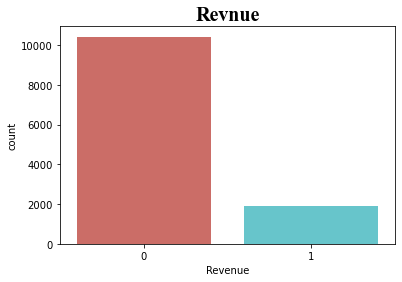

In [12]:
sns.countplot(x= 'Revenue', data = df , palette='hls')
plt.title('Revnue' , fontsize = 20 , fontname="Times New Roman",fontweight="bold")
plt.show()
#from the plot we can see the data is imbalance 

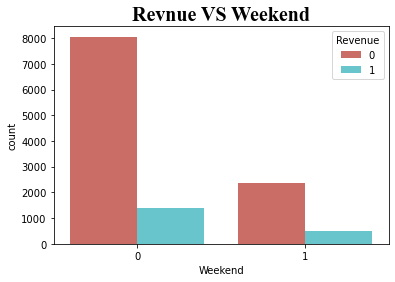

In [13]:
sns.countplot(x= 'Weekend', hue = 'Revenue', data = df ,palette='hls')
plt.title('Revnue VS Weekend' , fontsize = 20 , fontname="Times New Roman",fontweight="bold" )
plt.show()

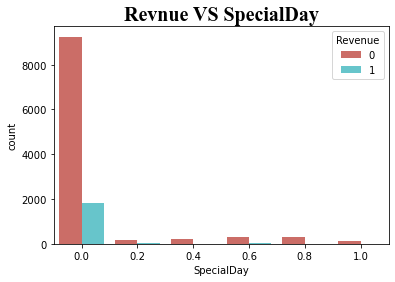

In [14]:
sns.countplot(x= 'SpecialDay', hue = 'Revenue', data = df ,palette='hls')
plt.title('Revnue VS SpecialDay' , fontsize = 20 , fontname="Times New Roman",fontweight="bold" )
plt.show()

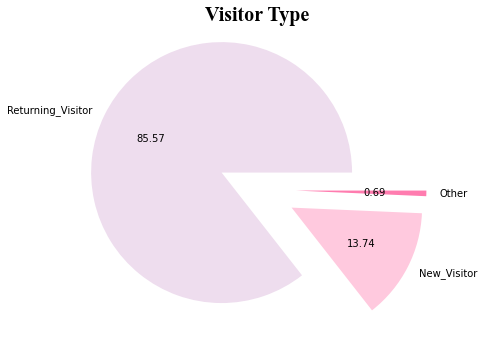

In [15]:
plt.figure(figsize = (10,6))
VistorTepy = df['VisitorType'].value_counts()
plt.pie(x = VistorTepy ,
       labels =['Returning_Visitor', 'New_Visitor', 'Other'] ,
       autopct='%.2f',
       colors=['#eeddee','#ffc9de','#ff7caf'], 
       explode = (0.3,0.3,0.3))

plt.title('Visitor Type' , fontsize = 20 , fontname="Times New Roman",fontweight="bold" )
plt.show()

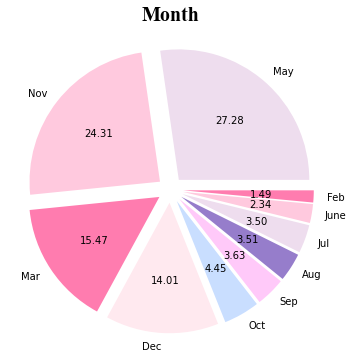

In [16]:
plt.figure(figsize = (10,6))
Month = df['Month'].value_counts()
plt.pie(x = Month ,
labels = ['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb'],
        autopct='%.2f',
        colors=['#eeddee','#ffc9de','#ff7caf', '#ffe9ef' , '#c9deff' , '#ffc9f9' , '#967dcb'], 
       explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Month' , fontsize = 20 , fontname="Times New Roman",fontweight="bold" )
plt.show()

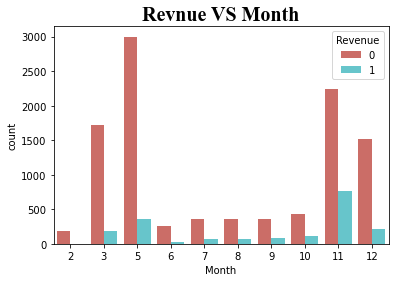

In [17]:
sns.countplot(x= 'Month', hue = 'Revenue', data = df ,palette='hls')
plt.title('Revnue VS Month' , fontsize = 20 , fontname="Times New Roman",fontweight="bold" )
plt.show()

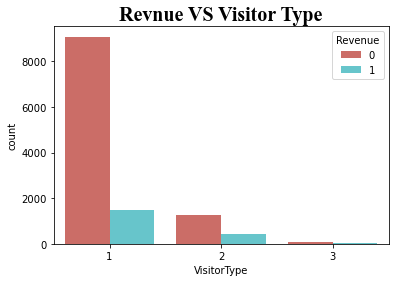

In [18]:
sns.countplot(x= 'VisitorType', hue = 'Revenue', data = df ,palette='hls')
plt.title('Revnue VS Visitor Type' , fontsize = 20 , fontname="Times New Roman",fontweight="bold" )
plt.show()

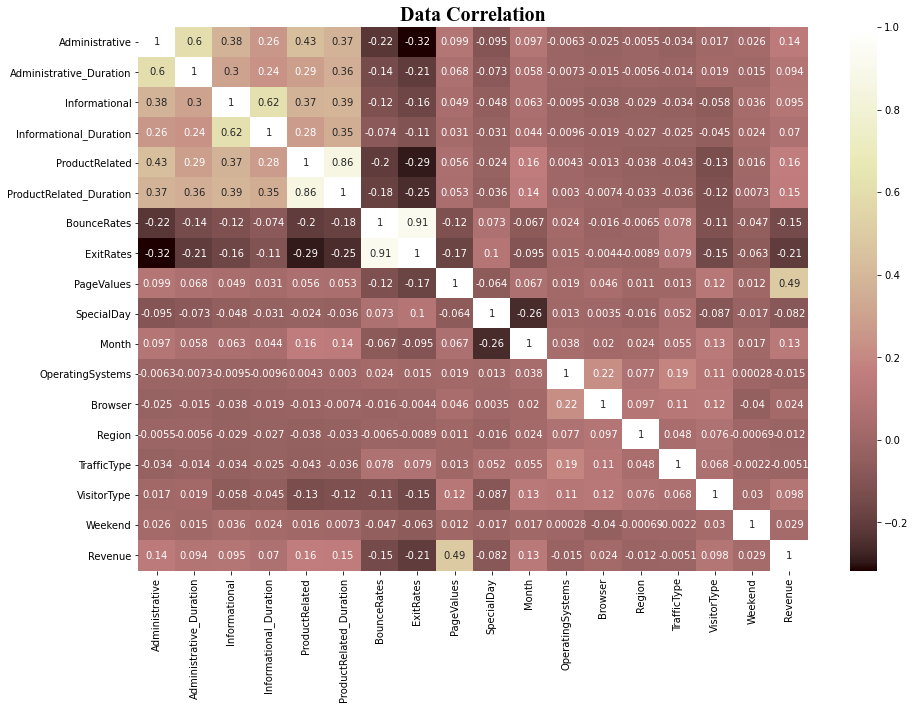

In [19]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap='pink')
plt.title('Data Correlation' , fontsize = 20 , fontname="Times New Roman",fontweight="bold" )
plt.show()


In [20]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,1,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,1,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,1,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,1,0,0


# Try to fit the model with all features and without handel the imbalance class

In [23]:
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression



feature_cols= ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','Month','OperatingSystems','Browser','Region',
               'TrafficType','VisitorType','Weekend']

X = df[feature_cols]
y = df['Revenue']
# make our overall X and y variables, this time our y is
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:

logreg = LogisticRegression()
# instantate our model

logreg.fit(X_train, y_train)

# fit our model to our training set
y_pred = logreg.predict(X_test)
print("Accuracy = ", logreg.score(X_test, y_test))
print("train error = ", 1- logreg.score(X_train, y_train))
print("test error = ", 1- logreg.score(X_test, y_test))

Accuracy =  0.88294133549608
train error =  0.12049588691924462
test error =  0.11705866450392
Accuracy =  0.8795041130807554


In [25]:
model = svm.SVC()
model.fit(X_train , y_train)
y_pred2 = model.predict(X_test)

print("Accuracy = ", model.score(X_test, y_test))
print("train error = ", 1- model.score(X_train , y_train))
print("test error = ", 1- model.score(X_test, y_test))

Accuracy =  0.8480670451473371
train error =  0.15374811725176685
test error =  0.1519329548526629
